# Question 0

A seminal chart in my field is .....

# Question 1

I made the plot given on Piazza but I made the interactive portion a dropdown so that you could either see it on a log scale with the info on humans, google, and IBM or a linear scale so you could just see the trends of gpu vs supercomputer. I think this helps the viewer understand both the trends within GPU vs supercomputer better while being able to then compare to the other 3 data points.It was also indicated on piazza that we could do this with matplotlib which I used because Bokeh has no boxplot option built in anymore (the previous one was deprecated).

In [161]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
data = pd.read_csv('hw_2_data/master_df_bloom_figure.csv')
data.head()

,year,type,gpw
0,2008,NVIDIA GPU,NaN
1,2008,NVIDIA GPU,NaN
2,2008,NVIDIA GPU,NaN
3,2007,NVIDIA GPU,0.550
4,2007,NVIDIA GPU,1.075


In [3]:
dataClean = data.dropna()
dataClean.head()

,year,type,gpw
3,2007,NVIDIA GPU,0.550000
4,2007,NVIDIA GPU,1.075000
5,2007,NVIDIA GPU,1.320000
6,2009,NVIDIA GPU,1.220000
7,2007,NVIDIA GPU,0.955556


In [21]:
gpu = dataClean['type'].str.contains('NVIDIA')
gpuClean = dataClean[gpu]
gpuClean
supercomputer = dataClean['type'].str.contains('supercomputer')
scClean = dataClean[supercomputer]

<IPython.core.display.Javascript object>


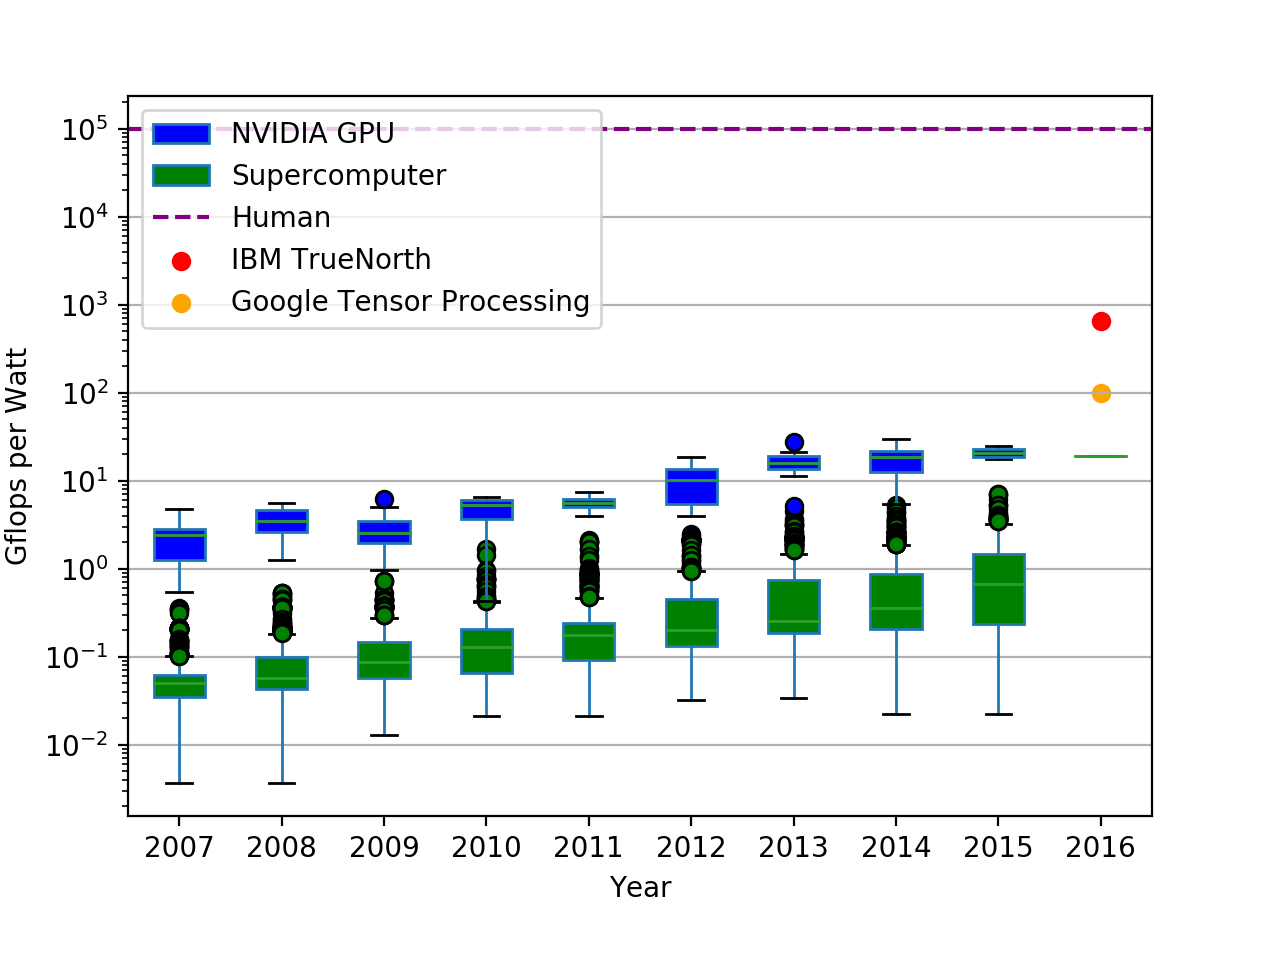

Dropdown(description='Scale:', options=('log', 'linear'), value='log')

In [164]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
plt.ion()
f1, ax1 = plt.subplots()

#Make supercomputer boxplot
SCflierprops = dict(marker='o', markerfacecolor='green',linestyle='none')
s = scClean.boxplot(column = 'gpw',by='year',ax= ax1,patch_artist = True, \
                    return_type = 'dict',flierprops=SCflierprops)['gpw']
for patch in s['boxes']:
    patch.set_facecolor('green')
shandle = patch

#Make NVIDIA GPU boxplot
Gflierprops = dict(marker='o', markerfacecolor='blue',linestyle='none')
g = gpuClean.boxplot(column = 'gpw',by='year',ax= ax1,patch_artist = True,return_type = 'dict', \
                    flierprops=Gflierprops)['gpw']
for patch2 in g['boxes']:
    patch2.set_facecolor('blue')
ghandle = patch2

#Make IBM TrueNorth point
ax1.scatter(10,657,c = 'red', label = 'IBM TrueNorth')

#Make Google Tensor Processing
ax1.scatter(10,100,c = 'orange', label ='Google Tensor Processing')

#Make human line

ax1.axhline(y = 1e5,label = 'Human',color = 'purple',ls = '--')
h, l = ax1.get_legend_handles_labels()

#Fix formatting issues
ax1.set_title(' ')
f1.suptitle(' ')
ax1.set_ylabel('Gflops per Watt')
ax1.set_yscale('log')
ax1.set_xlabel('Year')
plt.legend(handles = [ghandle,shandle,h[0],h[1],h[2]],labels = ['NVIDIA GPU','Supercomputer',l[0],l[1],l[2]])
ax1.grid(axis = 'x')

#define interactive y-axis
w = widgets.Dropdown( \
                     options = ['log','linear'],
                     value = 'log',
                     description = 'Scale:'
                    )

def change_axis(event):
    if event['type'] == 'change' and event['name'] == 'value':
        ax1.set_yscale(event['new'])
        if event['new'] == 'linear':
            plt.ylim(1e-3,40)
        else:
            plt.ylim(1e-3,1.1e5)
w.observe(change_axis)    

display(w)

# Question 2

In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [120]:
nyt = pd.read_csv("hw_2_data/ny_temps.txt",sep = '\t')
gd = pd.read_csv("hw_2_data/google_data.txt",sep = '\t')
yd = pd.read_csv("hw_2_data/yahoo_data.txt",sep = '\t')

Text(0,0.5,'Temperature $ ^\\circ$F')

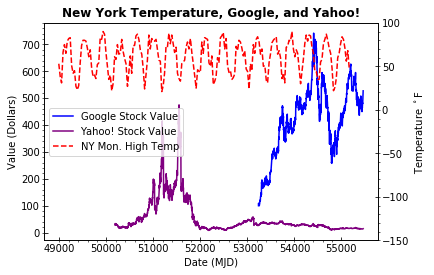

In [159]:
f2, ax2 = plt.subplots()

#Make right hand side
ax2b = ax2.twinx()
ax2b.set_ylim(bottom = -150, top = 100)
ax2b.plot(nyt['Modified Julian Date'],nyt['Max Temperature'],'r--', label = 'NY Mon. High Temp')
h2, l2 = ax2b.get_legend_handles_labels()

#Make left hand side
ax2.plot(gd['Modified Julian Date'],gd['Stock Value'],label = 'Google Stock Value', color = 'blue')
ax2.plot(yd['Modified Julian Date'],yd['Stock Value'],label = 'Yahoo! Stock Value',color ='purple')
h, l = ax2.get_legend_handles_labels()

#Format the plot
plt.legend(handles = [h[0],h[1],h2[0]],labels = [l[0],l[1],l2[0]], loc = 6)

ax2.set_title('New York Temperature, Google, and Yahoo!',fontweight = 'bold')
ax2.set_ylabel('Value (Dollars)')
ax2.set_xlabel('Date (MJD)')
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2b.get_yaxis().set_tick_params(direction='in')
xvals = range(49000,55000,200)
yvals = range(0,800,20)
y2vals = range(-150,100,10)
ax2.set_xticks(xvals, minor=True)
ax2.set_yticks(yvals, minor=True)
ax2b.set_yticks(y2vals,minor=True)
ax2b.set_ylabel(r'Temperature $ ^\circ$F')